# Mapa Mundo em relação ao número total de casos de COVID-19 por país

In [1]:
from qgis.gui import *
from qgis import processing
from qgis.PyQt import QtGui
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image
from qgis.utils import iface

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True)
#from qgis.server import *
from qgis.gui import *
from qgis import processing
from qgis.PyQt import QtGui
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image
from qgis.utils import iface

qgs = QgsApplication([], True)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/josea/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/josea/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [4]:
from qgis.core import (
    QgsVectorLayer
)

In [5]:
vlayer = QgsVectorLayer(r'C:\Windows\System32\0 SIG\MapaData\Countries\ne_10m_admin_0_sovereignty.shp', "ne_10m_admin_0_sovereignty", "ogr")

if not vlayer.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(vlayer)

Camada carregada!


In [6]:
uri = r'file:///C:\Windows\System32\0 SIG\MapaData\World_Total.csv?delimiter=,'

csv_file = QgsVectorLayer(uri, 'World', 'delimitedtext')

if not csv_file.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(csv_file)

Camada carregada!


In [7]:
QgsProject.instance().addMapLayer(vlayer)
QgsProject.instance().addMapLayer(csv_file)
csvField='countryterritoryCode'
shpField='ADM0_A3_IS'

joinObject=QgsVectorLayerJoinInfo()

joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)

joinObject.setJoinLayerId(csv_file.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_file)

vlayer.addJoin(joinObject)

vectorlayer = QgsProject.instance().mapLayersByName('ne_10m_admin_0_sovereignty')[0]

for field in vectorlayer.fields():
    print("Column "+field.name()+" Load")

Column featurecla Load
Column scalerank Load
Column LABELRANK Load
Column SOVEREIGNT Load
Column SOV_A3 Load
Column ADM0_DIF Load
Column LEVEL Load
Column TYPE Load
Column ADMIN Load
Column ADM0_A3 Load
Column GEOU_DIF Load
Column GEOUNIT Load
Column GU_A3 Load
Column SU_DIF Load
Column SUBUNIT Load
Column SU_A3 Load
Column BRK_DIFF Load
Column NAME Load
Column NAME_LONG Load
Column BRK_A3 Load
Column BRK_NAME Load
Column BRK_GROUP Load
Column ABBREV Load
Column POSTAL Load
Column FORMAL_EN Load
Column FORMAL_FR Load
Column NAME_CIAWF Load
Column NOTE_ADM0 Load
Column NOTE_BRK Load
Column NAME_SORT Load
Column NAME_ALT Load
Column MAPCOLOR7 Load
Column MAPCOLOR8 Load
Column MAPCOLOR9 Load
Column MAPCOLOR13 Load
Column POP_EST Load
Column POP_RANK Load
Column GDP_MD_EST Load
Column POP_YEAR Load
Column LASTCENSUS Load
Column GDP_YEAR Load
Column ECONOMY Load
Column INCOME_GRP Load
Column WIKIPEDIA Load
Column FIPS_10_ Load
Column ISO_A2 Load
Column ISO_A3 Load
Column ISO_A3_EH Load
Colu

In [8]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "World_cases"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(12)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

<QgsRectangle: -179.99999999999991473 -89.99999999999994316, 180 83.63410065300007545>
Gerar mapa com 900 por 434


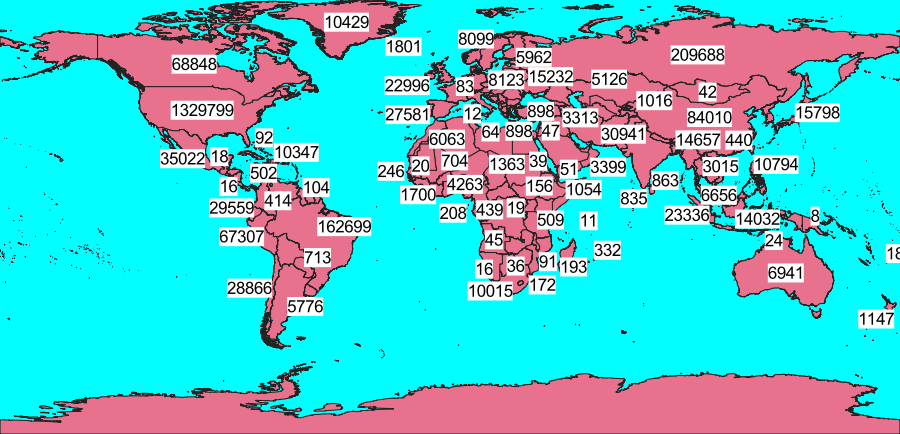

In [9]:
vectorlayer = QgsProject.instance().mapLayersByName('ne_10m_admin_0_sovereignty')[0]

xt = vectorlayer.extent()
print(xt)

width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('world_total.png',"PNG")
Image( imgbuf.data() )

Foi criada a imagem world_total.png com o mapa mundo, sendo que se encontra indicado o número total de casos de COVID-19 presente em cada um dos países.

In [10]:
vectorlayer = QgsProject.instance().mapLayersByName('ne_10m_admin_0_sovereignty')[0]

myTargetField = 'World_cases'
myRangeList = []

myOpacity = 1

# Make our first symbol and range...
myMin = 0.0
myMax = 0.0
myLabel = 'Sem nenhum caso registado'
myColour = QtGui.QColor('#FFFFFF')
mySymbol1 = QgsSymbol.defaultSymbol(vectorlayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 0.1
myMax = 100.0
myLabel = '1 Caso'
myColour = QtGui.QColor('#ff8080')
mySymbol2 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#now make another symbol and range...
myMin = 100.1
myMax = 1000.0
myLabel = '2-8 Casos'
myColour = QtGui.QColor('#ff4040')
mySymbol3 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#now make another symbol and range...
myMin = 1000.1
myMax = 10000.0
myLabel = '9-183 Casos'
myColour = QtGui.QColor('#ff0000')
mySymbol4 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#now make another symbol and range...
myMin = 10000.1
myMax = 1000000.0
myLabel = 'Sem informacoes'
myColour = QtGui.QColor('#CA0000')
mySymbol5 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

#now make another symbol and range...
myMin = 1000000.1
myMax = 10000000.0
myLabel = '9-183 Casos'
myColour = QtGui.QColor('#A60000')
mySymbol6 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol6.setColor(myColour)
mySymbol6.setOpacity(myOpacity)
myRange6 = QgsRendererRange(myMin, myMax, mySymbol6, myLabel)
myRangeList.append(myRange6)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)

myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)

myRenderer.setClassAttribute(myTargetField)

vectorlayer.setRenderer(myRenderer)
QgsProject.instance().addMapLayer(vectorlayer)

<QgsRectangle: -179.99999999999991473 -89.99999999999994316, 180 83.63410065300007545>
Gerar mapa com 900 por 434


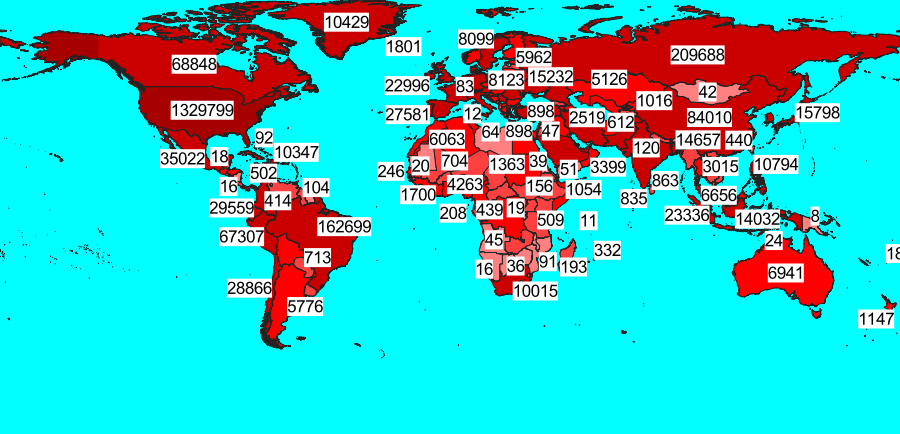

In [11]:
xt = vectorlayer.extent()
print(xt)

width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('world_vermelho_total.png',"PNG")
Image( imgbuf.data() )

Foi criada a imagem world_vermelho_total.png com o mapa mundo, sendo que se encontra graduado conforme o número total de casos de COVID-19 presente em cada um dos países.